In [44]:
import timeit
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean,stdev
import pickle as pkl

In [77]:
def average1(S):
    #S:sequence
    n = len(S)
    my_average = [0]*n
    for j in range(n):
        total = 0
        for i in range(j + 1):
            total += S[i]
        my_average[j] = total / (j+1)
    return my_average

def average2(S):
    #S:sequence
    n = len(S)
    my_average= [0]*n
    for j in range(n):
        my_average[j] = sum(S[0:j+1]) / (j+1)
    return my_average

def average3(S):
    #S:sequence
    n = len(S)
    my_average = [0]*n
    total = 0
    for j in range(n):
        total += S[j]
        my_average[j] = total / (j+1)
    return my_average

In [81]:
S1, S2, S3 = {},{},{}
sizes = [10**i for i in range(1,6)]
# sizes = [i for i in range(1,10000000,100)]
for input_size in sizes:
    print(input_size)
    S1[input_size], S2[input_size], S3[input_size] = [], [], []

    S = np.random.uniform(size=input_size)
    
    for e in range(20):
        starttime = timeit.default_timer()
        average1(S)
        S1[input_size].append(timeit.default_timer() - starttime)

        starttime = timeit.default_timer()
        average2(S)
        S2[input_size].append(timeit.default_timer() - starttime)

        starttime = timeit.default_timer()
        average3(S)
        S3[input_size].append(timeit.default_timer() - starttime)

10
100
1000
10000
100000


KeyboardInterrupt: 

In [82]:
with open('runtime.pkl','wb') as f:
    pkl.dump([S1,S2,S3],f)

In [97]:
with open('runtime.pkl','rb') as f:
    S1,S2,S3 = pkl.load(f)

del(S1[100000])
del(S2[100000])
del(S3[100000])


Text(0.5, 0, 'Input size')

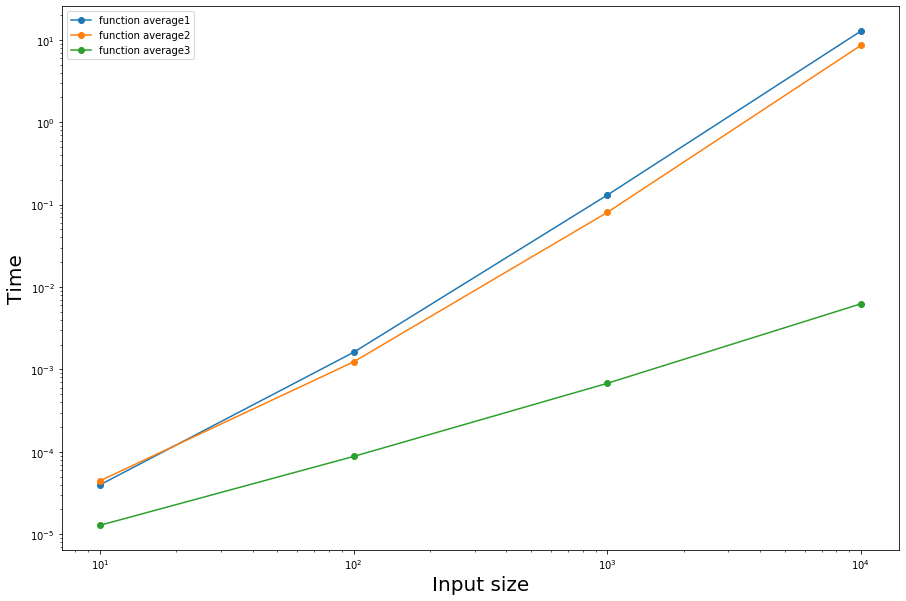

In [98]:
plt.figure(figsize=(15, 10))
plt.plot(list(S1.keys()),[mean(S1[n]) for n in S1],'o-',label='function average1')
plt.plot(list(S2.keys()),[mean(S2[n]) for n in S2],'o-',label='function average2')
plt.plot(list(S3.keys()),[mean(S3[n]) for n in S3],'o-',label='function average3')
plt.legend()

plt.xscale('log')
plt.yscale('log')
plt.ylabel("Time",size=20)
plt.xlabel("Input size",size=20)
